# Task 2 Bufferbloat

## Part 1: Get Mininet up and running

Measure Delay Between the Two Hosts = avg RTT: 20.401  


## Part 2 - Web page download time and CWND

It took 1 second 

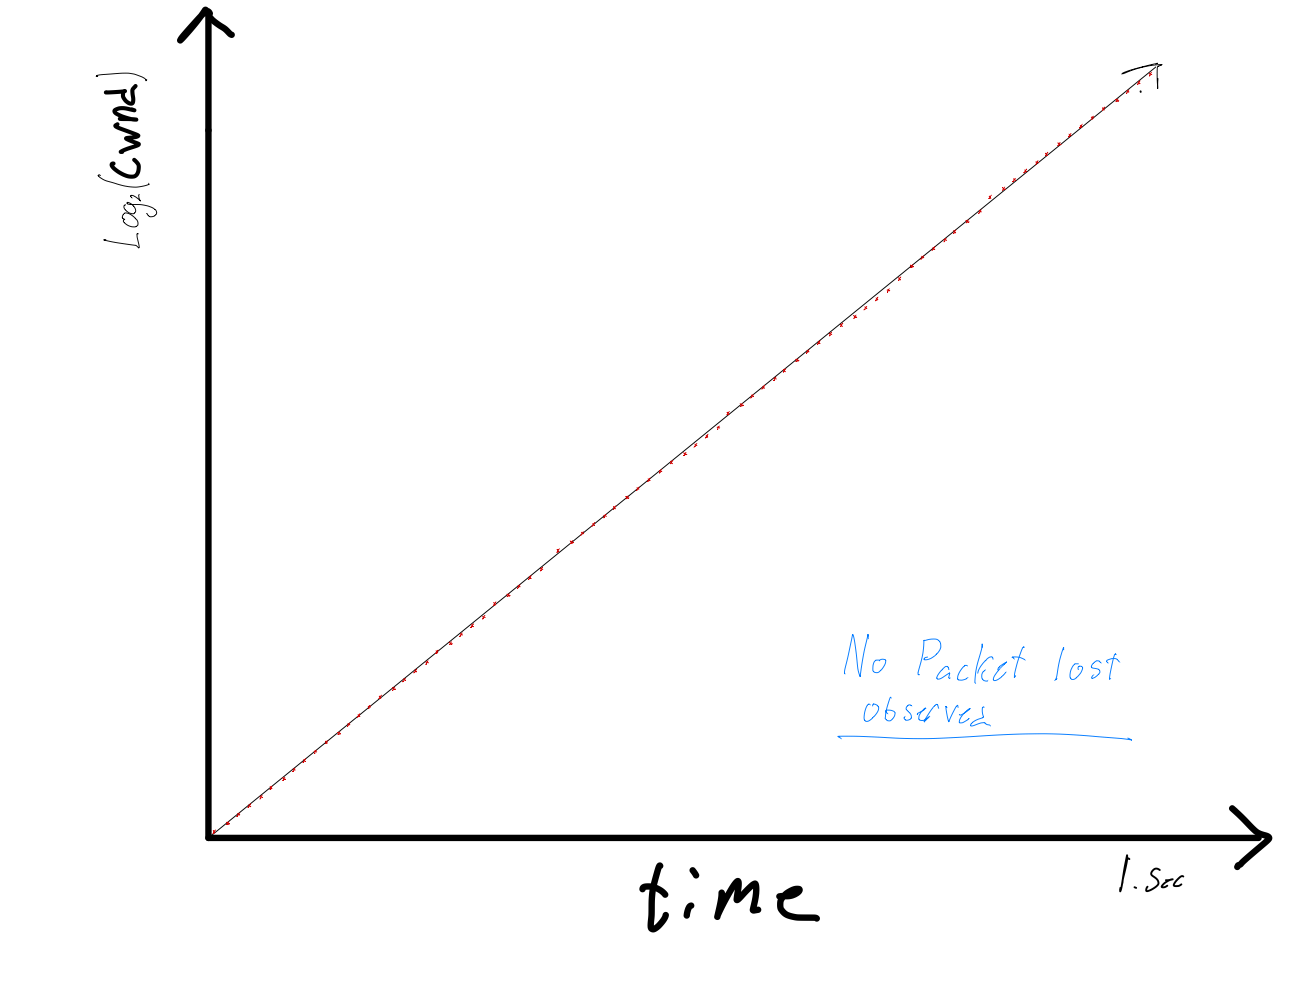

**OBS Log on y axis** it is in slow start during the whole transfer



# Part 3 - "streaming video" - sketch TCP CWND and buffer occupancy. 
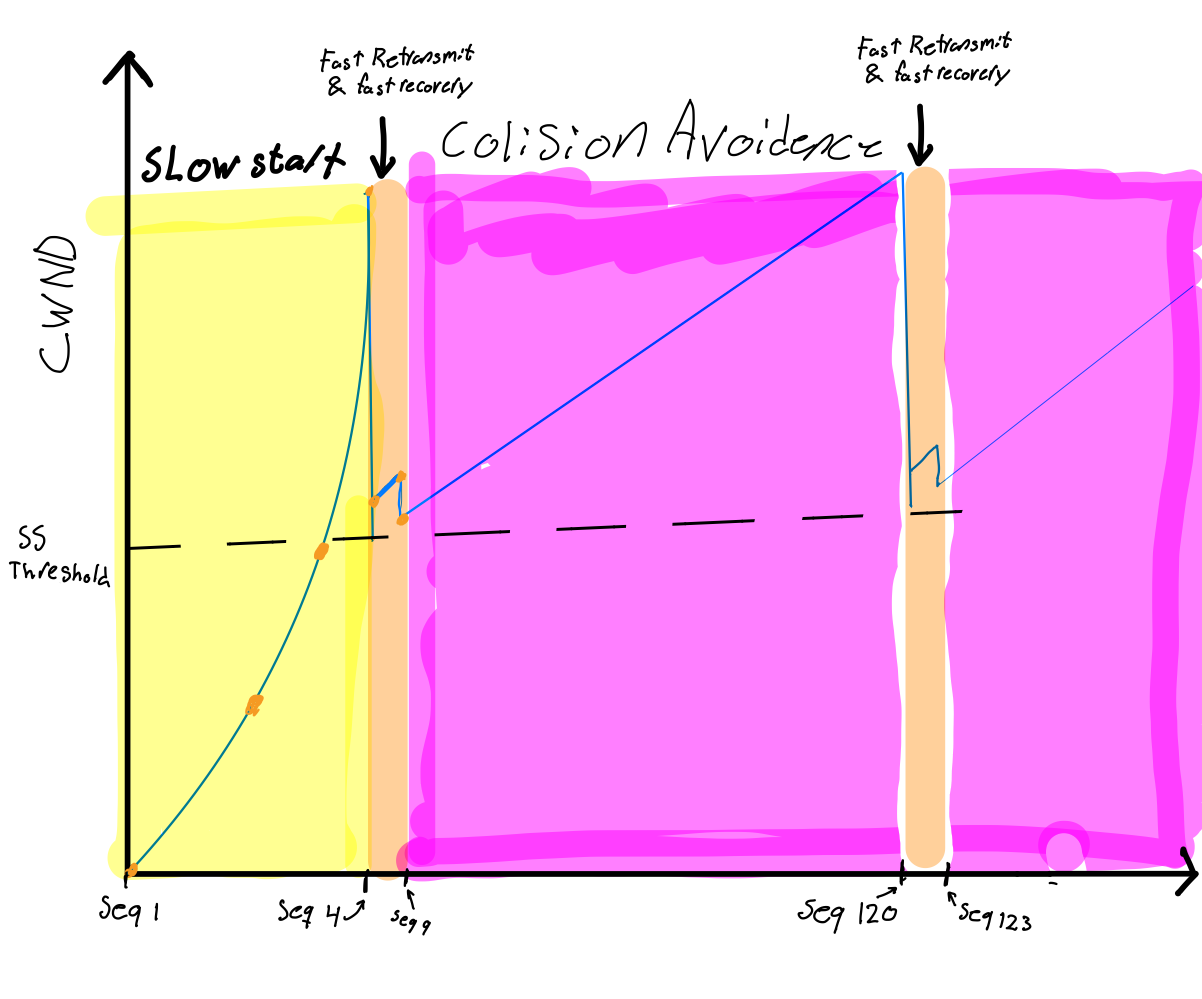

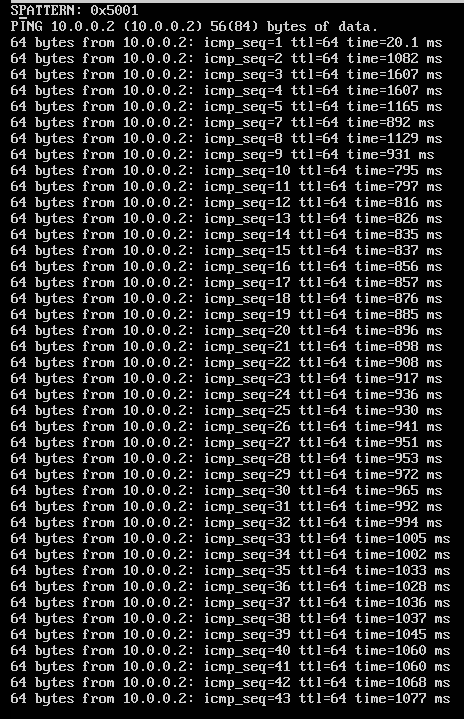
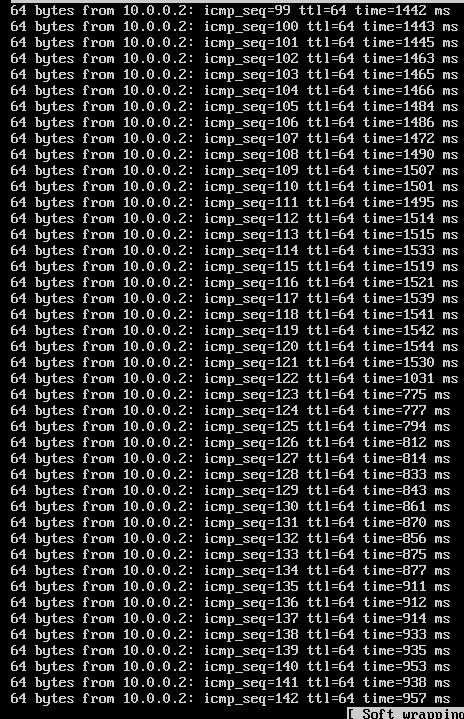
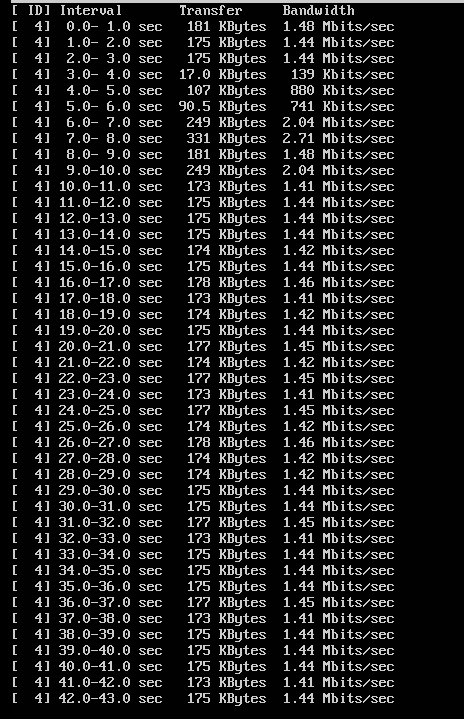
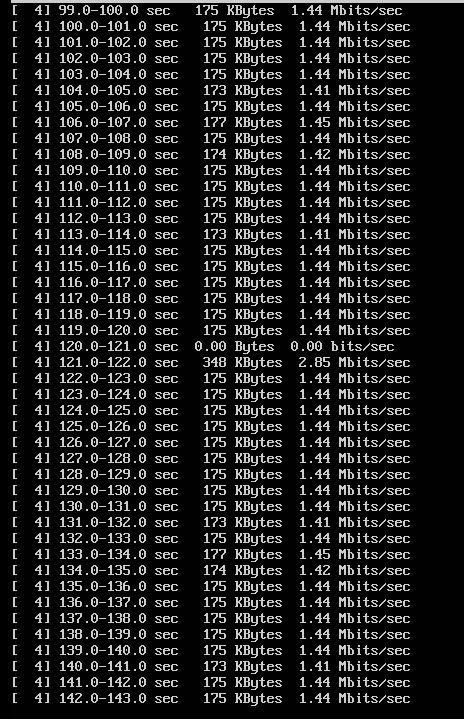

### The impact on Short Flow 

It now took 9.3 seconds to transfer the 173 Kbyts

It takes longer, due to TCP RENO CNWD grows until Timeout or trippel dup-ACK. Whitch acurer when the Buffer is full. This is indicatede by the longer ping times. 


## Part 4: Measuring the real cwnd and buffer occupancy values.

**Queue**
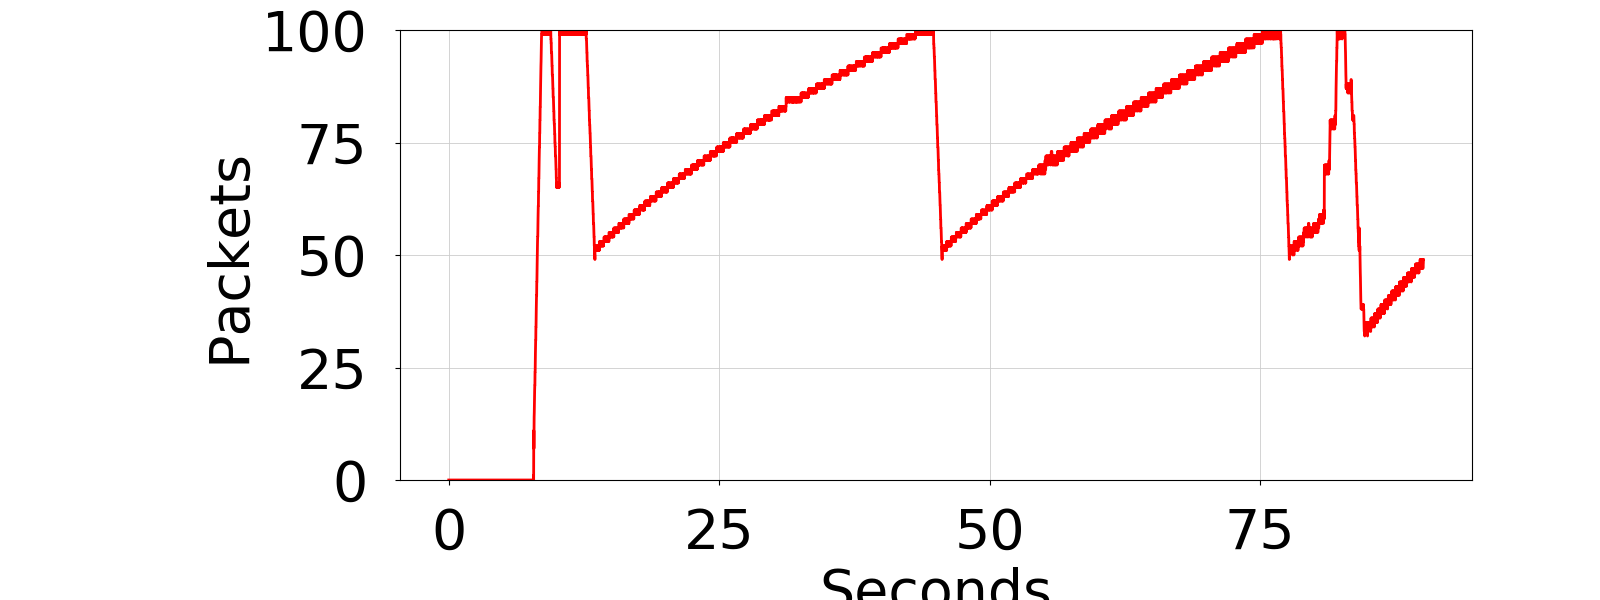

**CWND iperf**
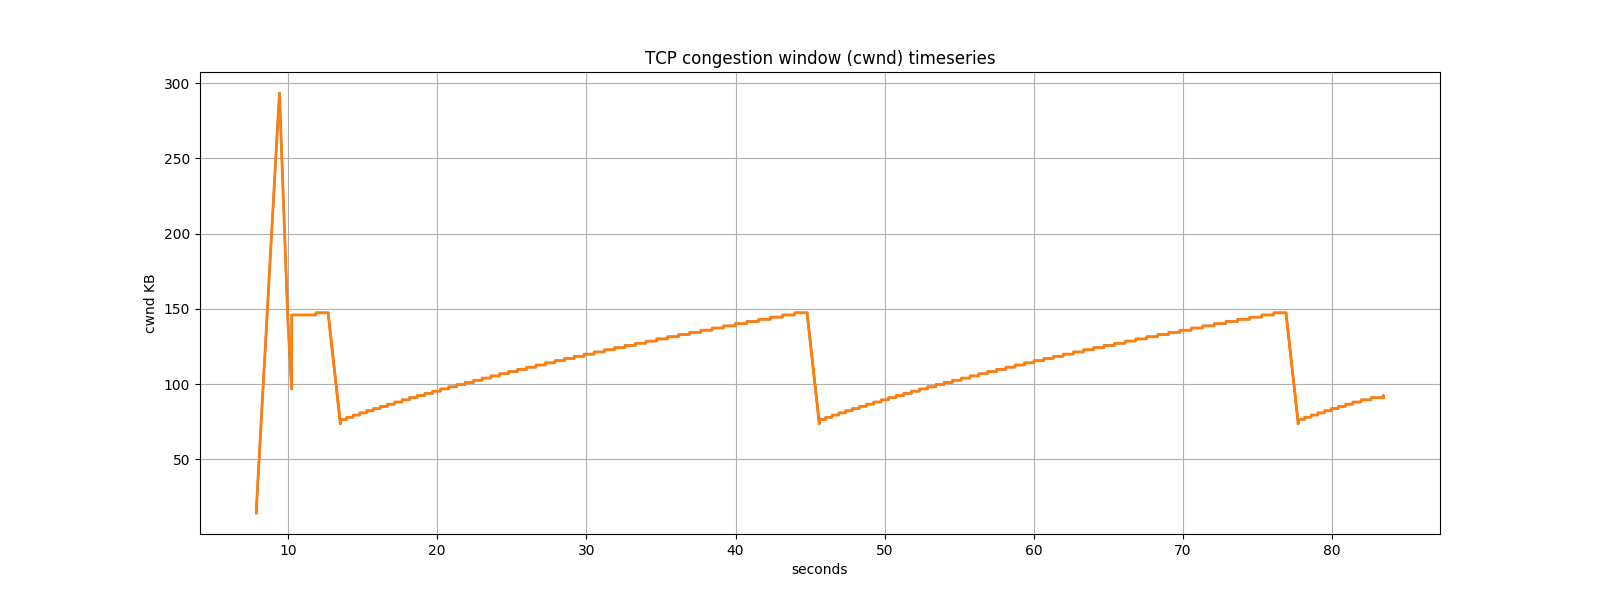

**CWND wget**
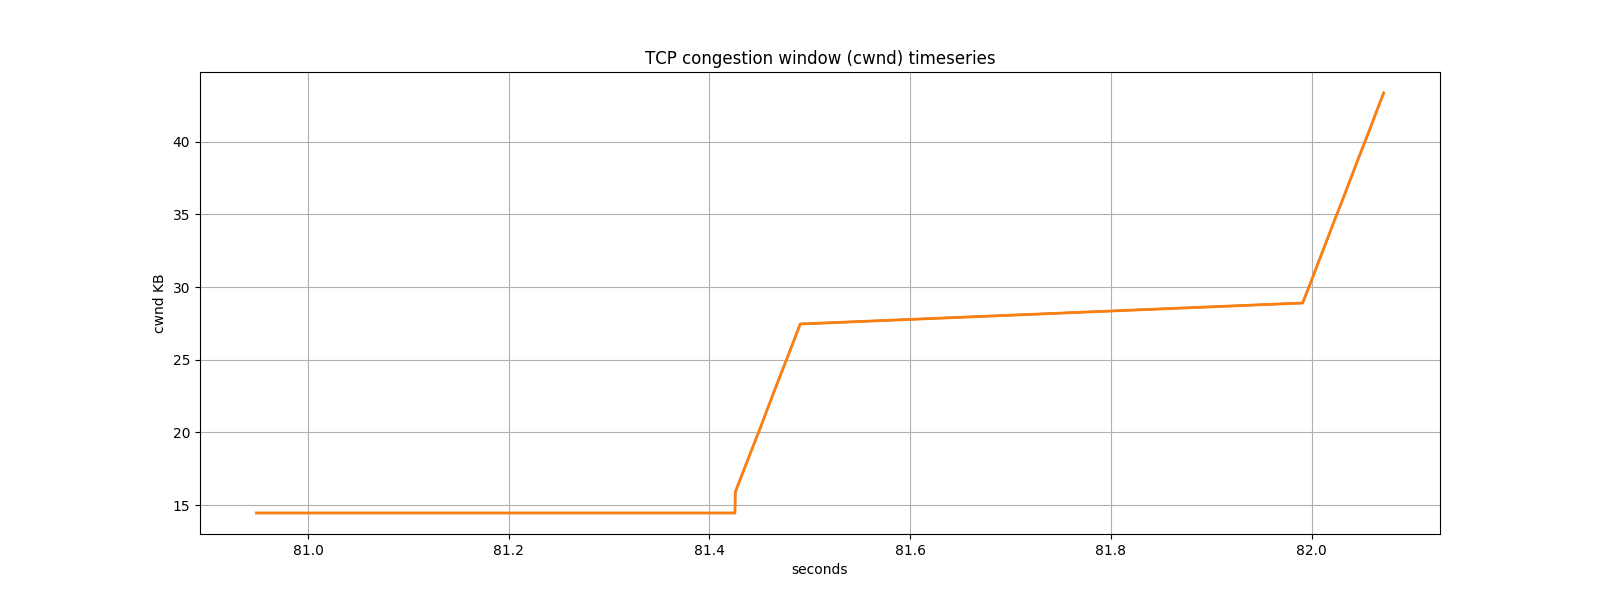

## Part 5 
**How we think it will behave**

**Queue**
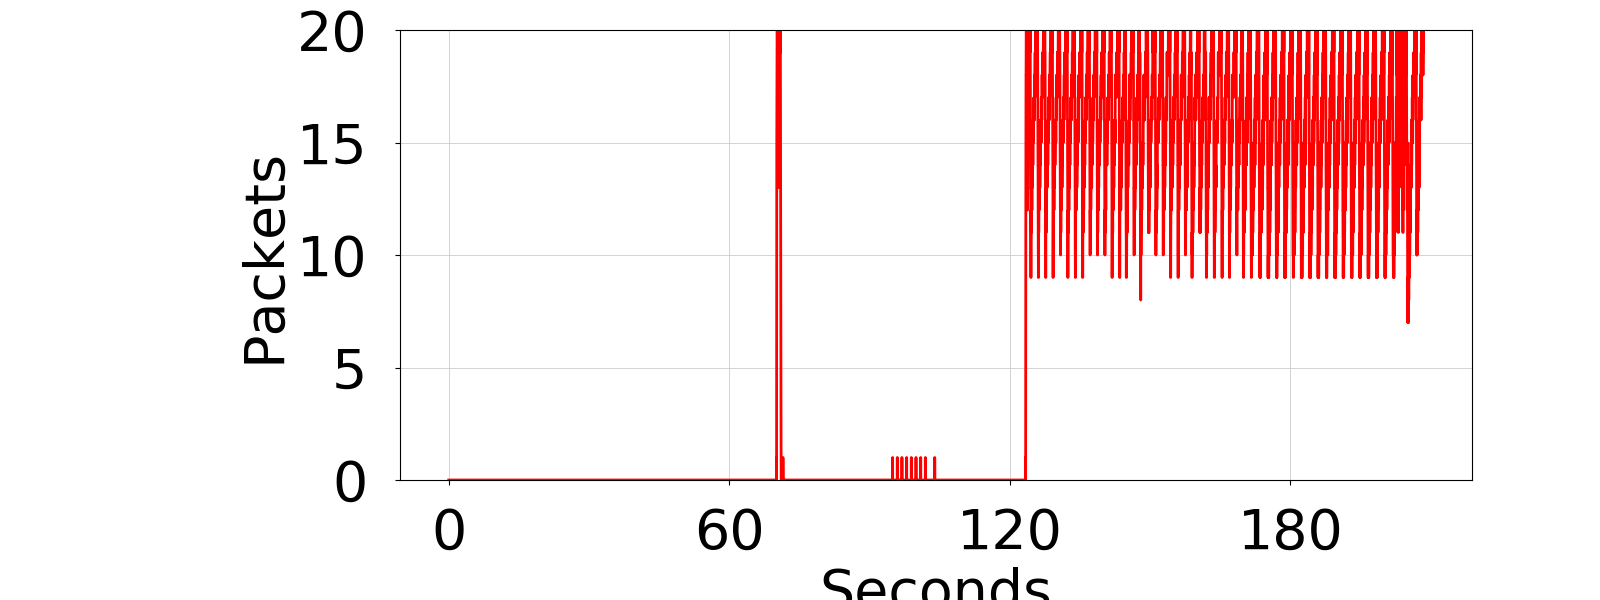
**CWND iperf**
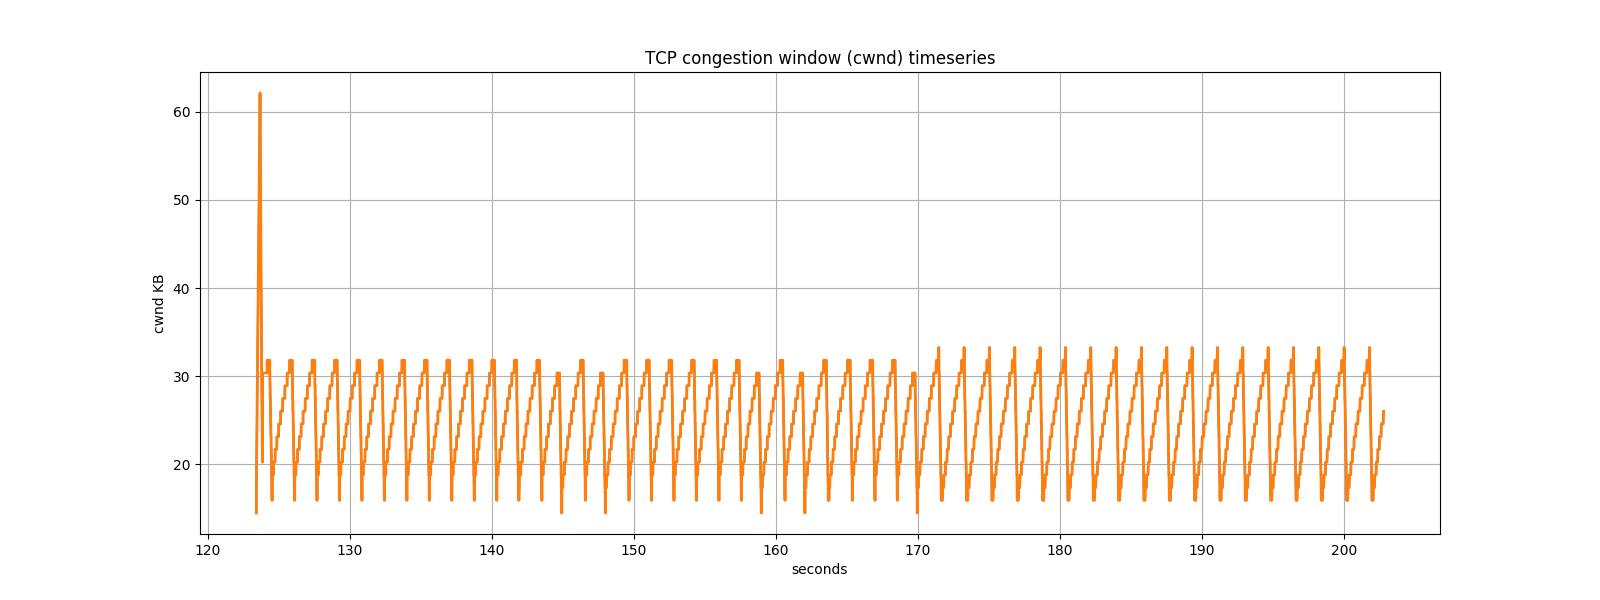
**CWND wget**
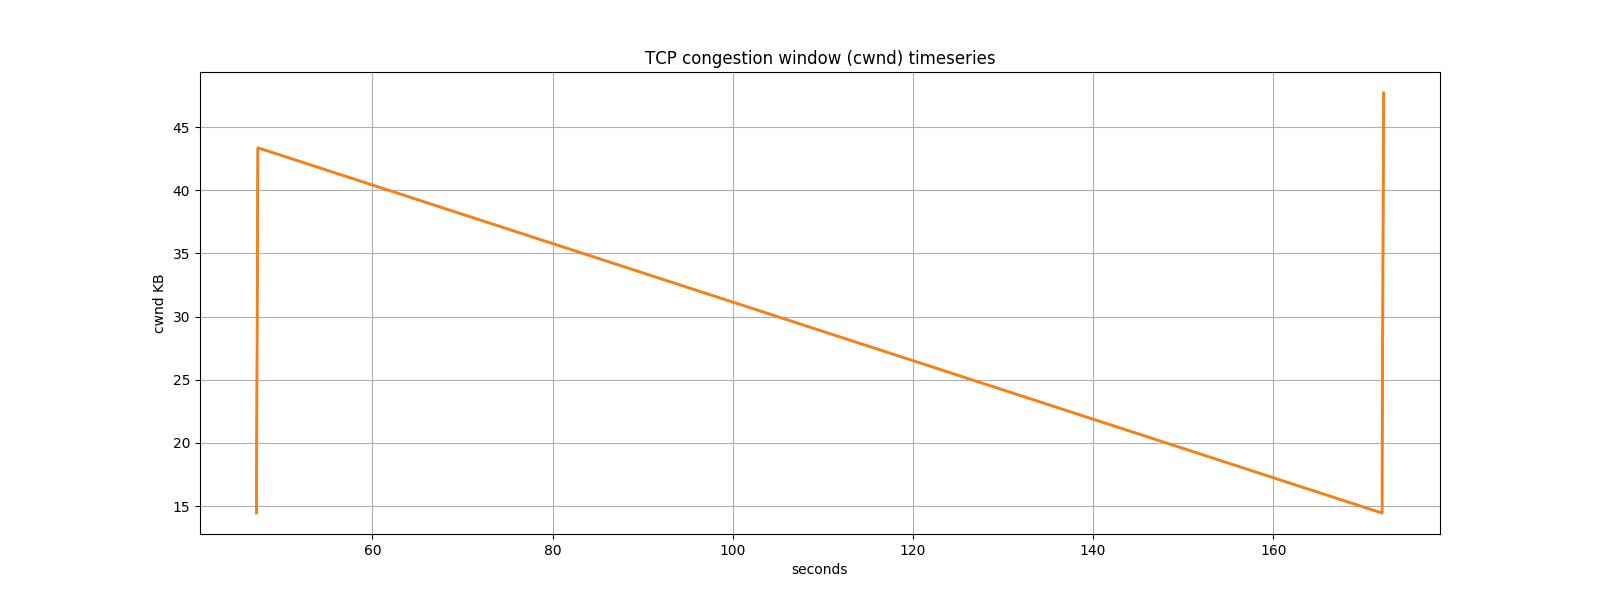




## Part 6 - Different queues
It can be seen that multi buffers diff config archive much better ping times  

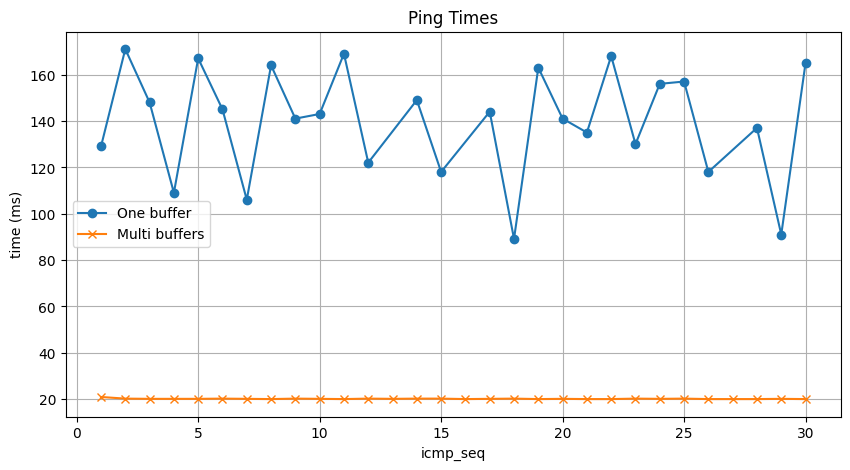

In [15]:
import re

import matplotlib.pyplot as plt

# Function to parse ping data
def parse_ping_data(ping_data):
    seq_times = []
    for line in ping_data[17:]:
        match = re.search(r'icmp_seq=(\d+) ttl=\d+ time=([\d.]+) ms', line)
        if match:
            seq_times.append((int(match.group(1)), float(match.group(2))))
    return seq_times

# Ping data from Outputs.txt
with open('mininet/Outputs.txt') as f:
    outputs_txt = f.readlines()
with open('mininet/Output_diff.txt') as f:
    output_diff_txt = f.readlines()


# Parse the ping data
seq_times_outputs = parse_ping_data(outputs_txt)
seq_times_output_diff = parse_ping_data(output_diff_txt)

# Separate the data into x and y for plotting
x_outputs, y_outputs = zip(*seq_times_outputs)
x_output_diff, y_output_diff = zip(*seq_times_output_diff)

# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(x_outputs, y_outputs, label='One buffer', marker='o')
plt.plot(x_output_diff, y_output_diff, label='Multi buffers', marker='x')
plt.xlabel('icmp_seq')
plt.ylabel('time (ms)')
plt.title('Ping Times')
plt.legend()
plt.grid(True)
plt.savefig('mininet/ping_times.png')
plt.show()